In [1]:
import numpy as np
import math
import glob
import sys
import sklearn 

import matplotlib.pyplot as plt

import PrimaryTierFileHelper

In [2]:
###########################################################
# Define mode
###########################################################
isTrackMode = False

In [3]:
###########################################################
# Define file
###########################################################

#file = 'ccnutree_0'

file = 'ccnutree_0'

fileNames = glob.glob('/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '.root')

if (isTrackMode) : 
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_track.npz'
else :
    trainVarFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '_shower.npz'

print('fileNames:', fileNames)
print('trainVarFile:', trainVarFile)

fileNames: ['/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_0.root']
trainVarFile: /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_0_shower.npz


In [4]:
###########################################################
# Read tree
###########################################################
#nLinks, variables, y = PrimaryTierFileHelper.readTree(fileNames)

if (isTrackMode) :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect = PrimaryTierFileHelper.readTreeGroupLinks_track(fileNames)
else :
    nLinks, variables, y, isTruePrimaryLink, isLinkOrientationCorrect = PrimaryTierFileHelper.readTreeGroupLinks_shower(fileNames)

Reading tree:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_0.root , This may take a while...
We have  198264  to train on!


In [5]:
# 0 - primaryNSpacepoints

# 1, 6 - primaryNuVertexSeparation
# 2, 7 - primaryStartRegionNHits
# 3, 8 - primaryStartRegionNParticles
# 4, 9 - primaryDCA
# 5, 10 - primaryConnectionExtrapDistance 

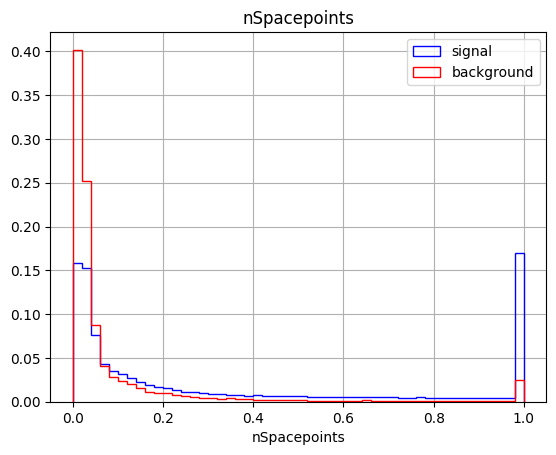

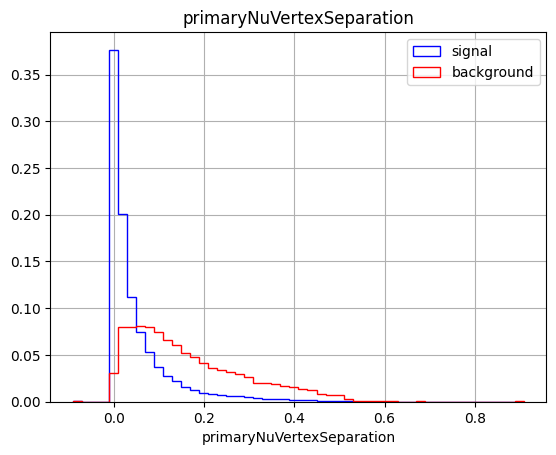

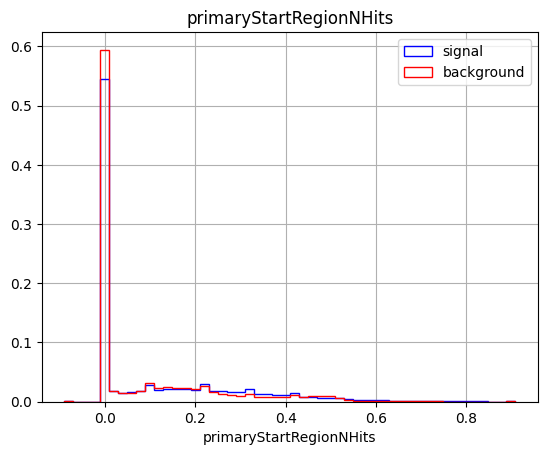

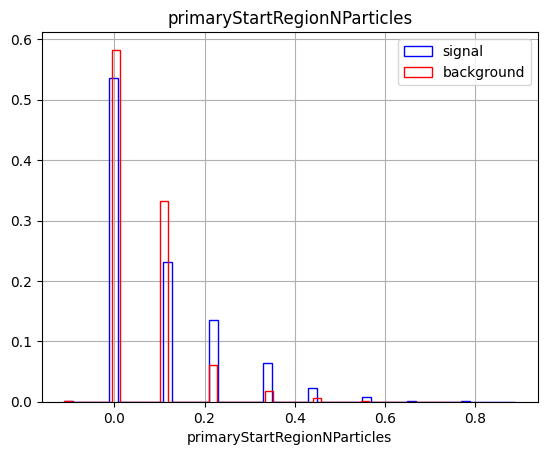

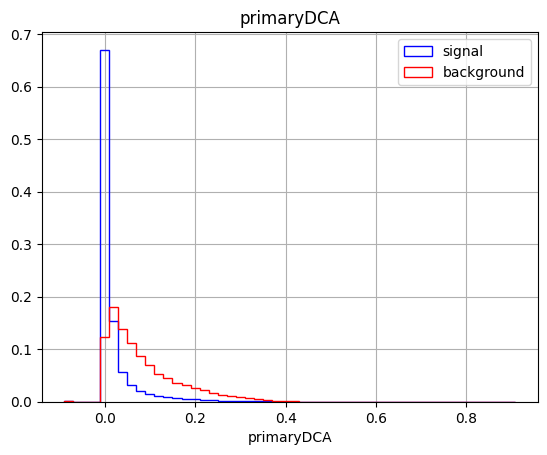

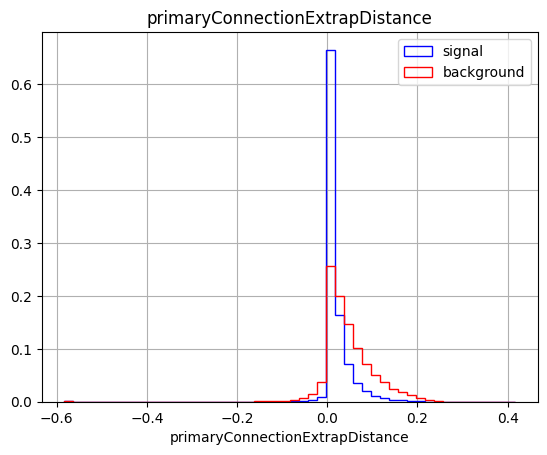

In [6]:
def drawSignalBackground(variable, truth_labels, graph_label) :
    
    signal_mask_vis = (truth_labels == 1).reshape(-1)
    background_mask_vis = (truth_labels == 0).reshape(-1)

    variable_signal = variable[signal_mask_vis].reshape(-1)
    variable_background = variable[background_mask_vis].reshape(-1)

    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights   
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   

def drawSignalBackgroundGroup_track(variable0, variable1, truth_link_orientation, truth_is_correct, graph_label) :
    
    signal_mask_0 = np.logical_and((truth_link_orientation[:,0] == 1), truth_is_correct).reshape(-1)
    signal_mask_1 = np.logical_and((truth_link_orientation[:,1] == 1), truth_is_correct).reshape(-1)
    wo_mask_0 = np.logical_and((truth_link_orientation[:,0] == 0), truth_is_correct).reshape(-1)
    wo_mask_1 = np.logical_and((truth_link_orientation[:,1] == 0), truth_is_correct).reshape(-1)
    background_mask = (truth_is_correct == 0).reshape(-1)
    
    variable_signal_0 = variable0[signal_mask_0].reshape(-1)
    variable_signal_1 = variable1[signal_mask_1].reshape(-1)
    variable_wo_0 = variable0[wo_mask_0].reshape(-1)
    variable_wo_1 = variable1[wo_mask_1].reshape(-1)
    variable_background_0 = variable0[background_mask].reshape(-1)
    variable_background_1 = variable0[background_mask].reshape(-1)
    
    variable_signal = np.concatenate((variable_signal_0, variable_signal_1))
    variable_wo = np.concatenate((variable_wo_0, variable_wo_1))
    variable_background = np.concatenate((variable_background_0, variable_background_1))
    
    #variable_signal = variable_signal[variable_signal > -9000]
    #variable_wo = variable_wo[variable_wo > -9000]
    #variable_background = variable_background[variable_background > -9000]
    
    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
    
    wo_weights = 1.0 / float(variable_wo.shape[0])
    wo_weights = np.ones(variable_wo.shape[0]) * wo_weights
    
    background_weights = 1.0 / float(variable_background.shape[0])
    background_weights = np.ones(variable_background.shape[0]) * background_weights  
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.hist(variable_wo, bins=50, color='orange', weights=wo_weights, label='wrong orientation', fill=False, histtype='step')
    plt.hist(variable_background, bins=50, color='red', weights=background_weights, label='background', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   
    
drawSignalBackground(variables[:, 0], isTruePrimaryLink, "nSpacepoints")

if (isTrackMode) :
    drawSignalBackgroundGroup_track(variables[:, 1], variables[:, 6], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackgroundGroup_track(variables[:, 2], variables[:, 7], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackgroundGroup_track(variables[:, 3], variables[:, 8], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackgroundGroup_track(variables[:, 4], variables[:, 9], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackgroundGroup_track(variables[:, 5], variables[:, 10], isLinkOrientationCorrect, isTruePrimaryLink, 'primaryConnectionExtrapDistance')   
else :
    drawSignalBackground(variables[:, 1], isTruePrimaryLink, 'primaryNuVertexSeparation')
    drawSignalBackground(variables[:, 2], isTruePrimaryLink, 'primaryStartRegionNHits')
    drawSignalBackground(variables[:, 3], isTruePrimaryLink, 'primaryStartRegionNParticles')    
    drawSignalBackground(variables[:, 4], isTruePrimaryLink, 'primaryDCA')    
    drawSignalBackground(variables[:, 5], isTruePrimaryLink, 'primaryConnectionExtrapDistance')

In [7]:
###########################################################
# This should shuffle things so that the indicies are still linked
###########################################################
variables, y, isTruePrimaryLink = sklearn.utils.shuffle(variables, y, isTruePrimaryLink)

In [8]:
###########################################################
# Write file
###########################################################

ntest = math.floor(nLinks * 0.1)
ntrain = math.floor(nLinks * 0.9)

print('ntest: ', ntest)
print('ntrain: ', ntrain)
    
variables_train = variables[:ntrain]
variables_test = variables[ntrain:]

y_train = y[:ntrain]
y_test = y[ntrain:]

isTruePrimaryLink_train = isTruePrimaryLink[:ntrain]
isTruePrimaryLink_test = isTruePrimaryLink[ntrain:]
    
np.savez(trainVarFile, variables_train=variables_train, y_train=y_train, isTruePrimaryLink_train=isTruePrimaryLink_train, variables_test=variables_test, y_test=y_test, isTruePrimaryLink_test=isTruePrimaryLink_test)

ntest:  19826
ntrain:  178437


In [9]:
print('variables_train: ', variables_train.shape)    
print('variables_test: ', variables_test.shape)  

print('y_train: ', y_train.shape)    
print('y_test: ', y_test.shape)  

print('isTruePrimaryLink_train:', isTruePrimaryLink_train.shape)
print('isTruePrimaryLink_test:', isTruePrimaryLink_test.shape)

variables_train:  (178437, 6)
variables_test:  (19827, 6)
y_train:  (178437,)
y_test:  (19827,)
isTruePrimaryLink_train: (178437,)
isTruePrimaryLink_test: (19827,)
